In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
comments_df = pd.read_csv('Youtube.csv')
cats_df = pd.read_csv('Youtube_Claude-oups.txt', sep=';')

In [ ]:
cats_df.head()


,Idx,cat1,cat2
0,1,14,5.0
1,2,8,5.0
2,3,5,1.0
3,4,1,3.0
4,5,7,5.0


In [ ]:
comments_df['cat1'] = cats_df['cat1']
comments_df['cat2'] = cats_df['cat2']

In [ ]:
comments_df.isnull().sum()

video_id          0
video_title       0
comment_author    0
comment_text      0
cat1              0
cat2              6
dtype: int64

In [ ]:
comments_df.dropna(inplace=True)
comments_df['cat2'] = comments_df['cat2'].astype(int)

comments_df = comments_df[comments_df['cat1'].isin(list(range(1,18)))]
comments_df = comments_df[comments_df['cat2'].isin(list(range(1,6)))]
comments_df.head()


,video_id,video_title,comment_author,comment_text,cat1,cat2
0,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@kurzgesagt,You want to learn more about science? Check ou...,14,5
1,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@joannawhite1841,And there a lot of apes with smartphones.,8,5
2,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@kermitthefrogkermy5988,Hopefully I can be one of the first people to ...,5,1
3,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@dylanx9327,dark mater hoax? ....look for article: Standar...,1,3
4,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@epiphany-bk4yg,🥵,7,5


In [ ]:
#if cat1 is 1,2,3, subcat1 is a, 4,5,6, subcat1 is b, 7,8, subcat1 is c, 9,10,11, subcat1 is d, 12,13, subcat1 is e, 14,15, subcat1 is f, 16,17, subcat1 is g
comments_df['subcat1'] = np.where(comments_df['cat1'] <= 3, 'a', np.where(comments_df['cat1'] <= 6, 'b', np.where(comments_df['cat1'] <= 8, 'c', np.where(comments_df['cat1'] <= 11, 'd', np.where(comments_df['cat1'] <= 13, 'e', np.where(comments_df['cat1'] <= 15, 'f', 'g'))))))
#if cat2 is 1,2, subcat2 is a, 3,4, subcat2 is b, 5,6 subcat2 is c
comments_df['subcat2'] = np.where(comments_df['cat2'] <= 2, 'p', np.where(comments_df['cat2'] <= 4, 'n', 'm'))


In [ ]:
comments_df

,video_id,video_title,comment_author,comment_text,cat1,cat2,subcat1,subcat2
0,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@kurzgesagt,You want to learn more about science? Check ou...,14,5,f,m
1,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@joannawhite1841,And there a lot of apes with smartphones.,8,5,c,m
2,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@kermitthefrogkermy5988,Hopefully I can be one of the first people to ...,5,1,b,p
3,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@dylanx9327,dark mater hoax? ....look for article: Standar...,1,3,a,n
4,QAa2O_8wBUQ,What is Dark Matter and Dark Energy?,@epiphany-bk4yg,🥵,7,5,c,m
...,...,...,...,...,...,...,...,...
2279,MtmgMu1OtDM,Exploring the Mysteries and Paradoxes of the U...,@livingart2576,Ok I’m getting bored of the same exact content...,13,4,e,n
2280,MtmgMu1OtDM,Exploring the Mysteries and Paradoxes of the U...,@lunamaria1048,Ughhhh Dark matter/energy do not exist... Thum...,5,4,b,n
2281,MtmgMu1OtDM,Exploring the Mysteries and Paradoxes of the U...,@rheinhardtgrafvonthiesenha8185,Stop re-editing the same shit over and over,13,3,e,n
2282,MtmgMu1OtDM,Exploring the Mysteries and Paradoxes of the U...,@Sketching4Sanity,LOVE,7,1,c,p


## population proportion

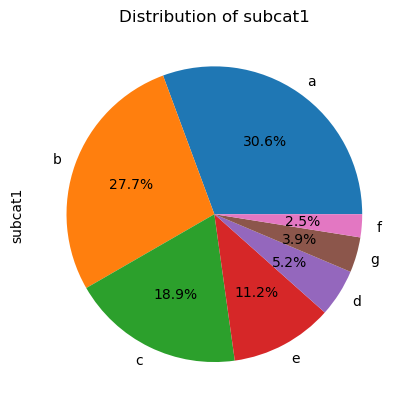

In [ ]:
#pie plot
comments_df['subcat1'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of subcat1')
plt.show()

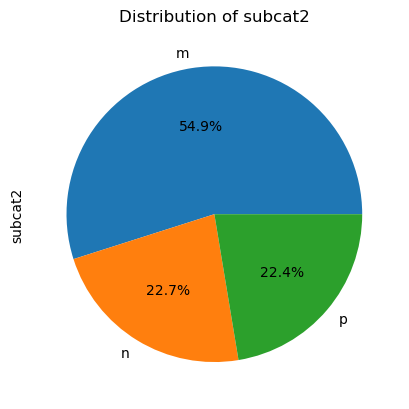

In [ ]:
comments_df['subcat2'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of subcat2')
plt.show()

## individual proportion (scale of video_id)

### cat1

In [ ]:
#create a new dataframe, look at unique video_id, and the percentage of each subcat1
df = comments_df.groupby('video_id').agg({'subcat1': 'value_counts'})
rename = {'subcat1': 'subcat1_count'}
df.rename(columns=rename, inplace=True)
cat1_pct_df = df['subcat1_count'].unstack().fillna(0)
cat1_pct_df = cat1_pct_df.div(cat1_pct_df.sum(axis=1), axis=0)*100
cat1_pct_df.head()

subcat1,a,b,c,d,e,f,g
video_id,,,,,,,
-GEZ95TJ5Ao,43.750000,29.166667,20.833333,2.083333,2.083333,0.000000,2.083333
1TqwBlTQfTg,8.163265,44.897959,8.163265,10.204082,22.448980,2.040816,4.081633
1VajnuxMJmU,53.333333,15.555556,15.555556,2.222222,8.888889,2.222222,2.222222
4_qJptwikRc,26.530612,36.734694,14.285714,6.122449,6.122449,4.081633,6.122449
5iA7wZfxglE,26.530612,32.653061,8.163265,4.081633,20.408163,4.081633,4.081633


### known the std among each video

In [ ]:
cat1_pct_df.describe()

subcat1,a,b,c,d,e,f,g
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,30.654122,27.590467,18.818971,5.169647,11.019522,2.563684,4.183587
std,12.214255,11.012714,8.737852,3.729321,7.838439,2.198414,4.676577
min,8.163265,6.000000,2.040816,0.000000,0.000000,0.000000,0.000000
25%,23.458333,19.183673,12.500000,2.062075,6.061224,0.000000,2.000000
50%,28.571429,28.571429,18.000000,4.081633,10.000000,2.083333,2.222222
75%,41.836735,34.000000,26.308784,8.000000,15.163265,4.081633,6.061224
max,55.102041,59.183673,39.583333,17.021277,34.000000,7.500000,26.086957


### cat2

In [ ]:
#create a new dataframe, look at unique video_id, and the percentage of each subcat1
df = comments_df.groupby('video_id').agg({'subcat2': 'value_counts'})
rename = {'subcat2': 'subcat2_count'}
df.rename(columns=rename, inplace=True)
cat2_pct_df = df['subcat2_count'].unstack().fillna(0)
cat2_pct_df = cat2_pct_df.div(cat2_pct_df.sum(axis=1), axis=0)*100
cat2_pct_df.head()

subcat2,m,n,p
video_id,,,
-GEZ95TJ5Ao,66.666667,29.166667,4.166667
1TqwBlTQfTg,26.530612,51.020408,22.448980
1VajnuxMJmU,48.888889,22.222222,28.888889
4_qJptwikRc,46.938776,28.571429,24.489796
5iA7wZfxglE,53.061224,22.448980,24.489796


In [ ]:
cat2_pct_df.describe()

subcat2,m,n,p
count,47.000000,47.000000,47.000000
mean,55.083115,22.561839,22.355046
std,15.172031,11.289288,13.550345
min,26.530612,2.000000,2.040816
25%,47.469388,14.285714,13.250000
50%,55.000000,22.000000,19.565217
75%,63.000000,29.583333,28.730159
max,89.795918,51.020408,65.306122


## generate features and utility analyses

.....